# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '..' not in sys.path:
    sys.path.insert(0, '..')

from src.m_utils import constants as cts
from src.base.data_loaders.data_loader import DLName
from src.base.gt_loaders.gt_names import GTName
from src.exp_runner import ExperimentRunner
from src.base.experiment.benchmark_dataset import BenchmarkDataset
from src.base.experiment.model_evaluator import DataSource, DataPredSelection
from src.base.experiment.base_models import BaseModel
from src.base.experiment.optimizers import Optimizer
from src.m_utils.mtl_approach import MTLApproach
from src.m_utils.nas_mtl_approach import NAS_MTLApproach
from src.m_utils.constants import ICAO_REQ, MNIST_TASK

 ==> Restrict GPU memory growth: True


# Start Network runner

In [3]:
kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'neural_arch_search',
        'description': 'NAS Approach 1 with MNIST dataset with 50 trials and patience and 1 child epoch',
        'tags': ['nas', 'nas_approach_1', 'benchamark', 'mnist', '1_child_epochs'],
        'src_files': ["src"]
    },
    'properties': {
        'approach': NAS_MTLApproach.APPROACH_1,
        'benchmarking': {
            'use_benchmark_data': True,
            'benchmark_dataset': BenchmarkDataset.MNIST,
            'tasks': list(MNIST_TASK)
        },
        'icao_data': {
            'icao_gt': {
                'use_gt_data': False,
                'gt_names': {
                    'train_validation': [],
                    'test': [],
                    'train_validation_test': [GTName.FVC]
                },
            },
            'icao_dl': {
                'use_dl_data': False,
                'tagger_model': None
            },
            'reqs': list(ICAO_REQ),
            'aligned': False
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'exec_nas': True,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.MOBILENET_V2,
        'batch_size': 32,
        'n_epochs': 50,
        'early_stopping': 5,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    },
    'nas_params': {
        'max_blocks_per_branch': 5,
        'n_child_epochs': 1,
        'controller_epochs': 50,
        'controller_batch_size': 32,
        'n_trials': 50
    }
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 70221
Process ID: 255770
---------------------------
-----
Use Neptune:  True
-----
-------------------
Args: 
{'exp_params': {'description': 'NAS Approach 1 with MNIST dataset with 50 '
                               'trials and patience and 1 child epoch',
                'name': 'neural_arch_search',
                'src_files': ['src'],
                'tags': ['nas',
                         'nas_approach_1',
                         'benchamark',
                         'mnist',
                         '1_child_epochs']},
 'nas_params': {'controller_batch_size': 32,
                'controller_epochs': 50,
                'max_blocks_per_branch': 5,
                'n_child_epochs': 1,
                'n_trials': 50},
 'net_train_params': {'base_model': <BaseModel.MOBILENET_V2: {'name': 'mobilnet_v2', 'target_size': (224, 224), 'prep_function': <function preprocess_inpu

# Load Data

In [4]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
TrainData.shape: (48000, 11)
ValidationData.shape: (12000, 11)
TestData.shape: (10000, 11)
Data loaded


In [5]:
runner.train_data.head()

,img_name,n_0,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9
0,/home/guilherme/data1/Dropbox/Link to Desktop/...,0,0,0,0,1,0,0,0,0,0
1,/home/guilherme/data1/Dropbox/Link to Desktop/...,1,0,0,0,0,0,0,0,0,0
2,/home/guilherme/data1/Dropbox/Link to Desktop/...,0,1,0,0,0,0,0,0,0,0
3,/home/guilherme/data1/Dropbox/Link to Desktop/...,0,0,0,0,0,0,0,1,0,0
4,/home/guilherme/data1/Dropbox/Link to Desktop/...,0,0,0,0,0,0,0,0,1,0


# <font color='red'>Producing Fake Data</font>

# Data Generators

In [6]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 48000 validated image filenames.
Found 12000 validated image filenames.
Found 10000 validated image filenames.
TOTAL: 70000

Logging class indices
 .. MTL model not logging class indices!

Logging class labels
 COMPLIANT label: 1
 NON_COMPLIANT label: 0
 DUMMY label: -1
 DUMMY_CLS label: 2
 NO_ANSWER label: -99


# Setup Experiment

In [7]:
runner.setup_experiment()

-------------------- create experiment -------------------
Setup neptune properties and parameters
Properties and parameters setup done!


# Labels Distribution

In [8]:
%%capture
runner.summary_labels_dist()

# Neural Architecture Search

In [9]:
runner.run_neural_architeture_search()

-------------------- run neural architecture search -------------------
Executing neural architectural search
  Memory reseted
++++++++++++++++++++ STARTING NEW TRAIN ++++++++++++++++++++


 ------ Training 1 | Config: {'n_denses_0': 3, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 1} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,108,244
  .. Trainable params: 850,260
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.01851, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00170 | EER_interp: 0.00170 | ACC: 0.99830
  Task  1: n_1             | EER_mean: 0.00300 | EER_interp: 0.00300 | ACC: 0.99710
  Task  2: n_2             | EER_mean: 0.00420 | EER_interp: 0.00420 | ACC: 0.99580
  Task  3: n_3             | EER_mean: 0.00330 | EER_interp: 0.00280 | ACC: 0.99750
  Task  4: n_4             | EER_mean: 0.00420 | EER_interp: 0.00410 | ACC: 0.99600
  Task  5: n_5             | EER_mean: 0.00230 | EER_interp: 0.00210 | ACC: 0.99780
  Task  6: n_6             | EER_mean: 0.00240 | EER_interp: 0.00240 | ACC: 0.99760
  Task  7: n_7             | EER_mean: 0.00400 | EER_interp: 0.00400 | ACC: 0.99600
  Task  8: n_8             | EER_mean: 0.00510 | EER_interp: 0.00510 | ACC: 0.99500
  Task  9: n_9             | EER_mean: 0.00510 | EER_interp: 0.00520 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 23ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00310 | EER_interp: 0.00280 | ACC: 0.99690
  Task  1: n_1             | EER_mean: 0.00300 | EER_interp: 0.00300 | ACC: 0.99700
  Task  2: n_2             | EER_mean: 0.00930 | EER_interp: 0.00920 | ACC: 0.99080
  Task  3: n_3             | EER_mean: 0.00330 | EER_interp: 0.00270 | ACC: 0.99780
  Task  4: n_4             | EER_mean: 0.00510 | EER_interp: 0.00470 | ACC: 0.99570
  Task  5: n_5             | EER_mean: 0.00840 | EER_interp: 0.00840 | ACC: 0.99160
  Task  6: n_6             | EER_mean: 0.00310 | EER_interp: 0.00320 | ACC: 0.99680
  Task  7: n_7             | EER_mean: 0.00470 | EER_interp: 0.00480 | ACC: 0.99530
  Task  8: n_8             | EER_mean: 0.00510 | EER_interp: 0.00510 | ACC: 0.99500
  Task  9: n_9             | EER_mean: 0.00510 | EER_interp: 0.00430 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 23ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00080 | ACC: 0.99930
  Task  1: n_1             | EER_mean: 0.00590 | EER_interp: 0.00540 | ACC: 0.99510
  Task  2: n_2             | EER_mean: 0.00170 | EER_interp: 0.00170 | ACC: 0.99820
  Task  3: n_3             | EER_mean: 0.00350 | EER_interp: 0.00340 | ACC: 0.99650
  Task  4: n_4             | EER_mean: 0.00340 | EER_interp: 0.00300 | ACC: 0.99740
  Task  5: n_5             | EER_mean: 0.00270 | EER_interp: 0.00230 | ACC: 0.99740
  Task  6: n_6             | EER_mean: 0.00670 | EER_interp: 0.00640 | ACC: 0.99380
  Task  7: n_7             | EER_mean: 0.00710 | EER_interp: 0.00680 | ACC: 0.99340
  Task  8: n_8             | EER_mean: 0.00680 | EER_interp: 0.00610 | ACC: 0.99440
  Task  9: n_9             | EER_mean: 0.00680 | EER_interp: 0.00620 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00130 | EER_interp: 0.00110 | ACC: 0.99880
  Task  1: n_1             | EER_mean: 0.00740 | EER_interp: 0.00740 | ACC: 0.99260
  Task  2: n_2             | EER_mean: 0.01860 | EER_interp: 0.01860 | ACC: 0.98140
  Task  3: n_3             | EER_mean: 0.00590 | EER_interp: 0.00580 | ACC: 0.99410
  Task  4: n_4             | EER_mean: 0.00590 | EER_interp: 0.00570 | ACC: 0.99440
  Task  5: n_5             | EER_mean: 0.00700 | EER_interp: 0.00680 | ACC: 0.99310
  Task  6: n_6             | EER_mean: 0.00840 | EER_interp: 0.00780 | ACC: 0.99260
  Task  7: n_7             | EER_mean: 0.00610 | EER_interp: 0.00620 | ACC: 0.99390
  Task  8: n_8             | EER_mean: 0.01620 | EER_interp: 0.01580 | ACC: 0.98440
  Task  9: n_9             | EER_mean: 0.01190 | EER_interp: 0.01180 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 23ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00070 | EER_interp: 0.00080 | ACC: 0.99920
  Task  1: n_1             | EER_mean: 0.00260 | EER_interp: 0.00280 | ACC: 0.99730
  Task  2: n_2             | EER_mean: 0.00680 | EER_interp: 0.00650 | ACC: 0.99380
  Task  3: n_3             | EER_mean: 0.00400 | EER_interp: 0.00400 | ACC: 0.99600
  Task  4: n_4             | EER_mean: 0.00590 | EER_interp: 0.00580 | ACC: 0.99420
  Task  5: n_5             | EER_mean: 0.00560 | EER_interp: 0.00550 | ACC: 0.99450
  Task  6: n_6             | EER_mean: 0.00420 | EER_interp: 0.00410 | ACC: 0.99600
  Task  7: n_7             | EER_mean: 0.00630 | EER_interp: 0.00620 | ACC: 0.99400
  Task  8: n_8             | EER_mean: 0.00510 | EER_interp: 0.00490 | ACC: 0.99520
  Task  9: n_9             | EER_mean: 0.00460 | EER_interp: 0.00440 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 23ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00170 | EER_interp: 0.00160 | ACC: 0.99860
  Task  1: n_1             | EER_mean: 0.00520 | EER_interp: 0.00510 | ACC: 0.99500
  Task  2: n_2             | EER_mean: 0.00810 | EER_interp: 0.00830 | ACC: 0.99180
  Task  3: n_3             | EER_mean: 0.00400 | EER_interp: 0.00400 | ACC: 0.99600
  Task  4: n_4             | EER_mean: 0.00890 | EER_interp: 0.00870 | ACC: 0.99120
  Task  5: n_5             | EER_mean: 0.01030 | EER_interp: 0.00900 | ACC: 0.99200
  Task  6: n_6             | EER_mean: 0.01230 | EER_interp: 0.01240 | ACC: 0.98770
  Task  7: n_7             | EER_mean: 0.00510 | EER_interp: 0.00490 | ACC: 0.99490
  Task  8: n_8             | EER_mean: 0.00600 | EER_interp: 0.00590 | ACC: 0.99420
  Task  9: n_9             | EER_mean: 0.01100 | EER_interp: 0.01090 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00430 | EER_interp: 0.00420 | ACC: 0.99600
  Task  1: n_1             | EER_mean: 0.00520 | EER_interp: 0.00510 | ACC: 0.99500
  Task  2: n_2             | EER_mean: 0.00420 | EER_interp: 0.00420 | ACC: 0.99580
  Task  3: n_3             | EER_mean: 0.00580 | EER_interp: 0.00580 | ACC: 0.99420
  Task  4: n_4             | EER_mean: 0.00590 | EER_interp: 0.00590 | ACC: 0.99410
  Task  5: n_5             | EER_mean: 0.00320 | EER_interp: 0.00300 | ACC: 0.99680
  Task  6: n_6             | EER_mean: 0.00340 | EER_interp: 0.00340 | ACC: 0.99660
  Task  7: n_7             | EER_mean: 0.00600 | EER_interp: 0.00620 | ACC: 0.99400
  Task  8: n_8             | EER_mean: 0.00680 | EER_interp: 0.00680 | ACC: 0.99320
  Task  9: n_9             | EER_mean: 0.00540 | EER_interp: 0.00520 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00110 | EER_interp: 0.00100 | ACC: 0.99890
  Task  1: n_1             | EER_mean: 0.00550 | EER_interp: 0.00540 | ACC: 0.99450
  Task  2: n_2             | EER_mean: 0.01560 | EER_interp: 0.01540 | ACC: 0.98440
  Task  3: n_3             | EER_mean: 0.00440 | EER_interp: 0.00420 | ACC: 0.99570
  Task  4: n_4             | EER_mean: 0.00460 | EER_interp: 0.00440 | ACC: 0.99540
  Task  5: n_5             | EER_mean: 0.00370 | EER_interp: 0.00370 | ACC: 0.99630
  Task  6: n_6             | EER_mean: 0.00420 | EER_interp: 0.00420 | ACC: 0.99590
  Task  7: n_7             | EER_mean: 0.00340 | EER_interp: 0.00330 | ACC: 0.99660
  Task  8: n_8             | EER_mean: 0.00600 | EER_interp: 0.00600 | ACC: 0.99400
  Task  9: n_9             | EER_mean: 0.00680 | EER_interp: 0.00620 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 23ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00170 | EER_interp: 0.00170 | ACC: 0.99830
  Task  1: n_1             | EER_mean: 0.00290 | EER_interp: 0.00300 | ACC: 0.99710
  Task  2: n_2             | EER_mean: 0.00250 | EER_interp: 0.00240 | ACC: 0.99770
  Task  3: n_3             | EER_mean: 0.00280 | EER_interp: 0.00260 | ACC: 0.99720
  Task  4: n_4             | EER_mean: 0.00830 | EER_interp: 0.00840 | ACC: 0.99170
  Task  5: n_5             | EER_mean: 0.00370 | EER_interp: 0.00360 | ACC: 0.99640
  Task  6: n_6             | EER_mean: 0.00250 | EER_interp: 0.00240 | ACC: 0.99770
  Task  7: n_7             | EER_mean: 0.00260 | EER_interp: 0.00250 | ACC: 0.99740
  Task  8: n_8             | EER_mean: 0.00960 | EER_interp: 0.00990 | ACC: 0.99030
  Task  9: n_9             | EER_mean: 0.01690 | EER_interp: 0.01700 | ACC

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout
Communication with Neptune restored!



Epoch 00001: val_loss improved from inf to 0.01718, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 23ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00170 | EER_interp: 0.00170 | ACC: 0.99830
  Task  1: n_1             | EER_mean: 0.00240 | EER_interp: 0.00230 | ACC: 0.99760
  Task  2: n_2             | EER_mean: 0.00250 | EER_interp: 0.00240 | ACC: 0.99760
  Task  3: n_3             | EER_mean: 0.00810 | EER_interp: 0.00790 | ACC: 0.99220
  Task  4: n_4             | EER_mean: 0.00420 | EER_interp: 0.00380 | ACC: 0.99650
  Task  5: n_5             | EER_mean: 0.00190 | EER_interp: 0.00180 | ACC: 0.99820
  Task  6: n_6             | EER_mean: 0.00420 | EER_interp: 0.00400 | ACC: 0.99610
  Task  7: n_7             | EER_mean: 0.00530 | EER_interp: 0.00540 | ACC: 0.99470
  Task  8: n_8             | EER_mean: 0.00550 | EER_interp: 0.00580 | ACC: 0.99440
  Task  9: n_9             | EER_mean: 0.00420 | EER_interp: 0.00420 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 23ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00070 | ACC: 0.99950
  Task  1: n_1             | EER_mean: 0.00370 | EER_interp: 0.00360 | ACC: 0.99660
  Task  2: n_2             | EER_mean: 0.01100 | EER_interp: 0.01090 | ACC: 0.98920
  Task  3: n_3             | EER_mean: 0.00540 | EER_interp: 0.00560 | ACC: 0.99460
  Task  4: n_4             | EER_mean: 0.00960 | EER_interp: 0.00940 | ACC: 0.99040
  Task  5: n_5             | EER_mean: 0.00600 | EER_interp: 0.00580 | ACC: 0.99400
  Task  6: n_6             | EER_mean: 0.00250 | EER_interp: 0.00240 | ACC: 0.99780
  Task  7: n_7             | EER_mean: 0.00400 | EER_interp: 0.00380 | ACC: 0.99620
  Task  8: n_8             | EER_mean: 0.00500 | EER_interp: 0.00510 | ACC: 0.99500
  Task  9: n_9             | EER_mean: 0.00680 | EER_interp: 0.00680 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00100 | EER_interp: 0.00100 | ACC: 0.99900
  Task  1: n_1             | EER_mean: 0.00320 | EER_interp: 0.00340 | ACC: 0.99680
  Task  2: n_2             | EER_mean: 0.00370 | EER_interp: 0.00360 | ACC: 0.99630
  Task  3: n_3             | EER_mean: 0.00330 | EER_interp: 0.00310 | ACC: 0.99710
  Task  4: n_4             | EER_mean: 0.00350 | EER_interp: 0.00340 | ACC: 0.99650
  Task  5: n_5             | EER_mean: 0.00400 | EER_interp: 0.00440 | ACC: 0.99590
  Task  6: n_6             | EER_mean: 0.00330 | EER_interp: 0.00330 | ACC: 0.99670
  Task  7: n_7             | EER_mean: 0.00240 | EER_interp: 0.00240 | ACC: 0.99760
  Task  8: n_8             | EER_mean: 0.00340 | EER_interp: 0.00340 | ACC: 0.99660
  Task  9: n_9             | EER_mean: 0.00340 | EER_interp: 0.00340 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00060 | EER_interp: 0.00080 | ACC: 0.99930
  Task  1: n_1             | EER_mean: 0.00300 | EER_interp: 0.00280 | ACC: 0.99720
  Task  2: n_2             | EER_mean: 0.00460 | EER_interp: 0.00440 | ACC: 0.99540
  Task  3: n_3             | EER_mean: 0.00240 | EER_interp: 0.00230 | ACC: 0.99770
  Task  4: n_4             | EER_mean: 0.00340 | EER_interp: 0.00320 | ACC: 0.99690
  Task  5: n_5             | EER_mean: 0.00560 | EER_interp: 0.00540 | ACC: 0.99470
  Task  6: n_6             | EER_mean: 0.00250 | EER_interp: 0.00230 | ACC: 0.99780
  Task  7: n_7             | EER_mean: 0.00320 | EER_interp: 0.00320 | ACC: 0.99680
  Task  8: n_8             | EER_mean: 0.00500 | EER_interp: 0.00500 | ACC: 0.99510
  Task  9: n_9             | EER_mean: 0.00660 | EER_interp: 0.00670 | ACC

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout
Communication with Neptune restored!



Epoch 00001: val_loss improved from inf to 0.01868, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00170 | EER_interp: 0.00160 | ACC: 0.99840
  Task  1: n_1             | EER_mean: 0.00300 | EER_interp: 0.00290 | ACC: 0.99720
  Task  2: n_2             | EER_mean: 0.00340 | EER_interp: 0.00320 | ACC: 0.99700
  Task  3: n_3             | EER_mean: 0.00330 | EER_interp: 0.00320 | ACC: 0.99680
  Task  4: n_4             | EER_mean: 0.00470 | EER_interp: 0.00480 | ACC: 0.99530
  Task  5: n_5             | EER_mean: 0.01120 | EER_interp: 0.01120 | ACC: 0.98880
  Task  6: n_6             | EER_mean: 0.00330 | EER_interp: 0.00320 | ACC: 0.99700
  Task  7: n_7             | EER_mean: 0.00240 | EER_interp: 0.00240 | ACC: 0.99760
  Task  8: n_8             | EER_mean: 0.00940 | EER_interp: 0.00940 | ACC: 0.99070
  Task  9: n_9             | EER_mean: 0.00930 | EER_interp: 0.00920 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 21ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00130 | EER_interp: 0.00110 | ACC: 0.99880
  Task  1: n_1             | EER_mean: 0.00300 | EER_interp: 0.00300 | ACC: 0.99710
  Task  2: n_2             | EER_mean: 0.00250 | EER_interp: 0.00240 | ACC: 0.99760
  Task  3: n_3             | EER_mean: 0.00270 | EER_interp: 0.00260 | ACC: 0.99730
  Task  4: n_4             | EER_mean: 0.00490 | EER_interp: 0.00500 | ACC: 0.99510
  Task  5: n_5             | EER_mean: 0.00560 | EER_interp: 0.00550 | ACC: 0.99460
  Task  6: n_6             | EER_mean: 0.00170 | EER_interp: 0.00170 | ACC: 0.99830
  Task  7: n_7             | EER_mean: 0.00270 | EER_interp: 0.00260 | ACC: 0.99730
  Task  8: n_8             | EER_mean: 0.00500 | EER_interp: 0.00510 | ACC: 0.99500
  Task  9: n_9             | EER_mean: 0.00590 | EER_interp: 0.00590 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00120 | EER_interp: 0.00100 | ACC: 0.99880
  Task  1: n_1             | EER_mean: 0.00270 | EER_interp: 0.00280 | ACC: 0.99720
  Task  2: n_2             | EER_mean: 0.00330 | EER_interp: 0.00290 | ACC: 0.99680
  Task  3: n_3             | EER_mean: 0.00410 | EER_interp: 0.00400 | ACC: 0.99600
  Task  4: n_4             | EER_mean: 0.00340 | EER_interp: 0.00340 | ACC: 0.99660
  Task  5: n_5             | EER_mean: 0.00190 | EER_interp: 0.00180 | ACC: 0.99820
  Task  6: n_6             | EER_mean: 0.00350 | EER_interp: 0.00340 | ACC: 0.99650
  Task  7: n_7             | EER_mean: 0.00340 | EER_interp: 0.00330 | ACC: 0.99670
  Task  8: n_8             | EER_mean: 0.00340 | EER_interp: 0.00330 | ACC: 0.99680
  Task  9: n_9             | EER_mean: 0.00360 | EER_interp: 0.00350 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00040 | EER_interp: 0.00000 | ACC: 0.99970
  Task  1: n_1             | EER_mean: 0.00220 | EER_interp: 0.00220 | ACC: 0.99780
  Task  2: n_2             | EER_mean: 0.00250 | EER_interp: 0.00240 | ACC: 0.99780
  Task  3: n_3             | EER_mean: 0.00340 | EER_interp: 0.00380 | ACC: 0.99650
  Task  4: n_4             | EER_mean: 0.00340 | EER_interp: 0.00300 | ACC: 0.99740
  Task  5: n_5             | EER_mean: 0.00310 | EER_interp: 0.00300 | ACC: 0.99690
  Task  6: n_6             | EER_mean: 0.00250 | EER_interp: 0.00240 | ACC: 0.99780
  Task  7: n_7             | EER_mean: 0.00280 | EER_interp: 0.00300 | ACC: 0.99720
  Task  8: n_8             | EER_mean: 0.00600 | EER_interp: 0.00560 | ACC: 0.99480
  Task  9: n_9             | EER_mean: 0.00630 | EER_interp: 0.00610 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00230 | EER_interp: 0.00240 | ACC: 0.99770
  Task  1: n_1             | EER_mean: 0.00250 | EER_interp: 0.00240 | ACC: 0.99750
  Task  2: n_2             | EER_mean: 0.00720 | EER_interp: 0.00740 | ACC: 0.99280
  Task  3: n_3             | EER_mean: 0.00330 | EER_interp: 0.00320 | ACC: 0.99680
  Task  4: n_4             | EER_mean: 0.00510 | EER_interp: 0.00470 | ACC: 0.99570
  Task  5: n_5             | EER_mean: 0.00650 | EER_interp: 0.00640 | ACC: 0.99360
  Task  6: n_6             | EER_mean: 0.00550 | EER_interp: 0.00560 | ACC: 0.99450
  Task  7: n_7             | EER_mean: 0.00420 | EER_interp: 0.00410 | ACC: 0.99580
  Task  8: n_8             | EER_mean: 0.00940 | EER_interp: 0.00940 | ACC: 0.99060
  Task  9: n_9             | EER_mean: 0.00930 | EER_interp: 0.00920 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 21ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00180 | EER_interp: 0.00170 | ACC: 0.99820
  Task  1: n_1             | EER_mean: 0.00150 | EER_interp: 0.00140 | ACC: 0.99860
  Task  2: n_2             | EER_mean: 0.00250 | EER_interp: 0.00250 | ACC: 0.99750
  Task  3: n_3             | EER_mean: 0.00160 | EER_interp: 0.00160 | ACC: 0.99850
  Task  4: n_4             | EER_mean: 0.00670 | EER_interp: 0.00680 | ACC: 0.99320
  Task  5: n_5             | EER_mean: 0.00370 | EER_interp: 0.00340 | ACC: 0.99680
  Task  6: n_6             | EER_mean: 0.00670 | EER_interp: 0.00640 | ACC: 0.99390
  Task  7: n_7             | EER_mean: 0.00360 | EER_interp: 0.00380 | ACC: 0.99630
  Task  8: n_8             | EER_mean: 0.00770 | EER_interp: 0.00750 | ACC: 0.99270
  Task  9: n_9             | EER_mean: 0.00680 | EER_interp: 0.00660 | ACC

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout
Communication with Neptune restored!



Epoch 00001: val_loss improved from inf to 0.02329, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00070 | EER_interp: 0.00000 | ACC: 0.99930
  Task  1: n_1             | EER_mean: 0.00450 | EER_interp: 0.00440 | ACC: 0.99550
  Task  2: n_2             | EER_mean: 0.00630 | EER_interp: 0.00610 | ACC: 0.99380
  Task  3: n_3             | EER_mean: 0.00570 | EER_interp: 0.00560 | ACC: 0.99450
  Task  4: n_4             | EER_mean: 0.00550 | EER_interp: 0.00530 | ACC: 0.99460
  Task  5: n_5             | EER_mean: 0.00620 | EER_interp: 0.00640 | ACC: 0.99380
  Task  6: n_6             | EER_mean: 0.00340 | EER_interp: 0.00340 | ACC: 0.99660
  Task  7: n_7             | EER_mean: 0.00460 | EER_interp: 0.00470 | ACC: 0.99540
  Task  8: n_8             | EER_mean: 0.00510 | EER_interp: 0.00440 | ACC: 0.99620
  Task  9: n_9             | EER_mean: 0.00760 | EER_interp: 0.00720 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00360 | EER_interp: 0.00350 | ACC: 0.99640
  Task  1: n_1             | EER_mean: 0.00300 | EER_interp: 0.00300 | ACC: 0.99700
  Task  2: n_2             | EER_mean: 0.00570 | EER_interp: 0.00580 | ACC: 0.99420
  Task  3: n_3             | EER_mean: 0.00490 | EER_interp: 0.00440 | ACC: 0.99610
  Task  4: n_4             | EER_mean: 0.00420 | EER_interp: 0.00420 | ACC: 0.99590
  Task  5: n_5             | EER_mean: 0.00280 | EER_interp: 0.00270 | ACC: 0.99740
  Task  6: n_6             | EER_mean: 0.00330 | EER_interp: 0.00330 | ACC: 0.99670
  Task  7: n_7             | EER_mean: 0.00190 | EER_interp: 0.00140 | ACC: 0.99820
  Task  8: n_8             | EER_mean: 0.00770 | EER_interp: 0.00760 | ACC: 0.99250
  Task  9: n_9             | EER_mean: 0.00510 | EER_interp: 0.00510 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00080 | ACC: 0.99920
  Task  1: n_1             | EER_mean: 0.00370 | EER_interp: 0.00370 | ACC: 0.99630
  Task  2: n_2             | EER_mean: 0.00330 | EER_interp: 0.00340 | ACC: 0.99670
  Task  3: n_3             | EER_mean: 0.00320 | EER_interp: 0.00320 | ACC: 0.99680
  Task  4: n_4             | EER_mean: 0.00510 | EER_interp: 0.00400 | ACC: 0.99690
  Task  5: n_5             | EER_mean: 0.00320 | EER_interp: 0.00300 | ACC: 0.99680
  Task  6: n_6             | EER_mean: 0.00260 | EER_interp: 0.00260 | ACC: 0.99740
  Task  7: n_7             | EER_mean: 0.00200 | EER_interp: 0.00180 | ACC: 0.99810
  Task  8: n_8             | EER_mean: 0.00590 | EER_interp: 0.00600 | ACC: 0.99410
  Task  9: n_9             | EER_mean: 0.00760 | EER_interp: 0.00740 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 21ms/step
Prediction finished!


Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout
Communication with Neptune restored!


  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00090 | ACC: 0.99910
  Task  1: n_1             | EER_mean: 0.00300 | EER_interp: 0.00280 | ACC: 0.99720
  Task  2: n_2             | EER_mean: 0.00340 | EER_interp: 0.00340 | ACC: 0.99670
  Task  3: n_3             | EER_mean: 0.00490 | EER_interp: 0.00460 | ACC: 0.99560
  Task  4: n_4             | EER_mean: 0.00420 | EER_interp: 0.00420 | ACC: 0.99590
  Task  5: n_5             | EER_mean: 0.00650 | EER_interp: 0.00650 | ACC: 0.99350
  Task  6: n_6             | EER_mean: 0.00290 | EER_interp: 0.00270 | ACC: 0.99720
  Task  7: n_7             | EER_mean: 0.00550 | EER_interp: 0.00550 | ACC: 0.99450
  Task  8: n_8             | EER_mean: 0.00550 | EER_interp: 0.00530 | ACC: 0.99460
  Task  9: n_9             | EER_mean: 0.00680 | EER_interp: 0.00660 | ACC: 0.99360
final_EER_mean: 0.43% | final_ACC: 99.58%
--------------------FINISHING TRAIN--------------------
++++++++++++++++++++ STARTING NEW TRAIN ++++++++++++++++++++



/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00170 | EER_interp: 0.00160 | ACC: 0.99840
  Task  1: n_1             | EER_mean: 0.00440 | EER_interp: 0.00420 | ACC: 0.99590
  Task  2: n_2             | EER_mean: 0.00370 | EER_interp: 0.00400 | ACC: 0.99620
  Task  3: n_3             | EER_mean: 0.00330 | EER_interp: 0.00310 | ACC: 0.99710
  Task  4: n_4             | EER_mean: 0.00360 | EER_interp: 0.00350 | ACC: 0.99640
  Task  5: n_5             | EER_mean: 0.00470 | EER_interp: 0.00420 | ACC: 0.99610
  Task  6: n_6             | EER_mean: 0.00400 | EER_interp: 0.00400 | ACC: 0.99610
  Task  7: n_7             | EER_mean: 0.00240 | EER_interp: 0.00230 | ACC: 0.99780
  Task  8: n_8             | EER_mean: 0.00510 | EER_interp: 0.00490 | ACC: 0.99520
  Task  9: n_9             | EER_mean: 0.00480 | EER_interp: 0.00490 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00180 | EER_interp: 0.00140 | ACC: 0.99820
  Task  1: n_1             | EER_mean: 0.00300 | EER_interp: 0.00280 | ACC: 0.99740
  Task  2: n_2             | EER_mean: 0.00330 | EER_interp: 0.00340 | ACC: 0.99670
  Task  3: n_3             | EER_mean: 0.00410 | EER_interp: 0.00410 | ACC: 0.99590
  Task  4: n_4             | EER_mean: 0.00550 | EER_interp: 0.00570 | ACC: 0.99440
  Task  5: n_5             | EER_mean: 0.00560 | EER_interp: 0.00550 | ACC: 0.99450
  Task  6: n_6             | EER_mean: 0.00250 | EER_interp: 0.00240 | ACC: 0.99760
  Task  7: n_7             | EER_mean: 0.00400 | EER_interp: 0.00390 | ACC: 0.99620
  Task  8: n_8             | EER_mean: 0.00510 | EER_interp: 0.00510 | ACC: 0.99490
  Task  9: n_9             | EER_mean: 0.00480 | EER_interp: 0.00490 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00080 | EER_interp: 0.00080 | ACC: 0.99920
  Task  1: n_1             | EER_mean: 0.00440 | EER_interp: 0.00440 | ACC: 0.99550
  Task  2: n_2             | EER_mean: 0.00340 | EER_interp: 0.00340 | ACC: 0.99670
  Task  3: n_3             | EER_mean: 0.00410 | EER_interp: 0.00310 | ACC: 0.99770
  Task  4: n_4             | EER_mean: 0.00420 | EER_interp: 0.00390 | ACC: 0.99630
  Task  5: n_5             | EER_mean: 0.00650 | EER_interp: 0.00630 | ACC: 0.99380
  Task  6: n_6             | EER_mean: 0.00360 | EER_interp: 0.00340 | ACC: 0.99640
  Task  7: n_7             | EER_mean: 0.00400 | EER_interp: 0.00400 | ACC: 0.99600
  Task  8: n_8             | EER_mean: 0.00850 | EER_interp: 0.00850 | ACC: 0.99150
  Task  9: n_9             | EER_mean: 0.00550 | EER_interp: 0.00530 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00090 | ACC: 0.99910
  Task  1: n_1             | EER_mean: 0.00200 | EER_interp: 0.00210 | ACC: 0.99800
  Task  2: n_2             | EER_mean: 0.00510 | EER_interp: 0.00500 | ACC: 0.99510
  Task  3: n_3             | EER_mean: 0.00550 | EER_interp: 0.00560 | ACC: 0.99460
  Task  4: n_4             | EER_mean: 0.00340 | EER_interp: 0.00280 | ACC: 0.99770
  Task  5: n_5             | EER_mean: 0.00300 | EER_interp: 0.00290 | ACC: 0.99700
  Task  6: n_6             | EER_mean: 0.00500 | EER_interp: 0.00500 | ACC: 0.99500
  Task  7: n_7             | EER_mean: 0.00210 | EER_interp: 0.00220 | ACC: 0.99780
  Task  8: n_8             | EER_mean: 0.00600 | EER_interp: 0.00560 | ACC: 0.99480
  Task  9: n_9             | EER_mean: 0.00410 | EER_interp: 0.00420 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00170 | EER_interp: 0.00120 | ACC: 0.99920
  Task  1: n_1             | EER_mean: 0.00370 | EER_interp: 0.00360 | ACC: 0.99640
  Task  2: n_2             | EER_mean: 0.00780 | EER_interp: 0.00770 | ACC: 0.99220
  Task  3: n_3             | EER_mean: 0.00520 | EER_interp: 0.00500 | ACC: 0.99480
  Task  4: n_4             | EER_mean: 0.00680 | EER_interp: 0.00680 | ACC: 0.99320
  Task  5: n_5             | EER_mean: 0.00560 | EER_interp: 0.00460 | ACC: 0.99620
  Task  6: n_6             | EER_mean: 0.00670 | EER_interp: 0.00620 | ACC: 0.99420
  Task  7: n_7             | EER_mean: 0.00320 | EER_interp: 0.00320 | ACC: 0.99680
  Task  8: n_8             | EER_mean: 0.00450 | EER_interp: 0.00440 | ACC: 0.99550
  Task  9: n_9             | EER_mean: 0.00550 | EER_interp: 0.00570 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00170 | EER_interp: 0.00150 | ACC: 0.99870
  Task  1: n_1             | EER_mean: 0.00420 | EER_interp: 0.00420 | ACC: 0.99580
  Task  2: n_2             | EER_mean: 0.00250 | EER_interp: 0.00250 | ACC: 0.99750
  Task  3: n_3             | EER_mean: 0.00330 | EER_interp: 0.00300 | ACC: 0.99720
  Task  4: n_4             | EER_mean: 0.00420 | EER_interp: 0.00300 | ACC: 0.99800
  Task  5: n_5             | EER_mean: 0.00490 | EER_interp: 0.00480 | ACC: 0.99510
  Task  6: n_6             | EER_mean: 0.00250 | EER_interp: 0.00250 | ACC: 0.99750
  Task  7: n_7             | EER_mean: 0.00320 | EER_interp: 0.00320 | ACC: 0.99680
  Task  8: n_8             | EER_mean: 0.00510 | EER_interp: 0.00510 | ACC: 0.99500
  Task  9: n_9             | EER_mean: 0.00420 | EER_interp: 0.00420 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00610 | EER_interp: 0.00600 | ACC: 0.99390
  Task  1: n_1             | EER_mean: 0.00440 | EER_interp: 0.00430 | ACC: 0.99580
  Task  2: n_2             | EER_mean: 0.02290 | EER_interp: 0.02290 | ACC: 0.97710
  Task  3: n_3             | EER_mean: 0.01160 | EER_interp: 0.01150 | ACC: 0.98840
  Task  4: n_4             | EER_mean: 0.00670 | EER_interp: 0.00680 | ACC: 0.99320
  Task  5: n_5             | EER_mean: 0.00910 | EER_interp: 0.00920 | ACC: 0.99090
  Task  6: n_6             | EER_mean: 0.00640 | EER_interp: 0.00660 | ACC: 0.99360
  Task  7: n_7             | EER_mean: 0.00870 | EER_interp: 0.00800 | ACC: 0.99260
  Task  8: n_8             | EER_mean: 0.01270 | EER_interp: 0.01230 | ACC: 0.98740
  Task  9: n_9             | EER_mean: 0.00760 | EER_interp: 0.00760 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00170 | EER_interp: 0.00170 | ACC: 0.99830
  Task  1: n_1             | EER_mean: 0.00520 | EER_interp: 0.00520 | ACC: 0.99480
  Task  2: n_2             | EER_mean: 0.01440 | EER_interp: 0.01420 | ACC: 0.98580
  Task  3: n_3             | EER_mean: 0.00490 | EER_interp: 0.00470 | ACC: 0.99550
  Task  4: n_4             | EER_mean: 0.00590 | EER_interp: 0.00590 | ACC: 0.99410
  Task  5: n_5             | EER_mean: 0.00650 | EER_interp: 0.00640 | ACC: 0.99360
  Task  6: n_6             | EER_mean: 0.00500 | EER_interp: 0.00470 | ACC: 0.99550
  Task  7: n_7             | EER_mean: 0.00530 | EER_interp: 0.00540 | ACC: 0.99470
  Task  8: n_8             | EER_mean: 0.00770 | EER_interp: 0.00770 | ACC: 0.99230
  Task  9: n_9             | EER_mean: 0.00760 | EER_interp: 0.00750 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00090 | ACC: 0.99910
  Task  1: n_1             | EER_mean: 0.00220 | EER_interp: 0.00200 | ACC: 0.99820
  Task  2: n_2             | EER_mean: 0.00250 | EER_interp: 0.00250 | ACC: 0.99750
  Task  3: n_3             | EER_mean: 0.00450 | EER_interp: 0.00430 | ACC: 0.99560
  Task  4: n_4             | EER_mean: 0.00430 | EER_interp: 0.00420 | ACC: 0.99580
  Task  5: n_5             | EER_mean: 0.00370 | EER_interp: 0.00360 | ACC: 0.99640
  Task  6: n_6             | EER_mean: 0.00330 | EER_interp: 0.00310 | ACC: 0.99710
  Task  7: n_7             | EER_mean: 0.00470 | EER_interp: 0.00480 | ACC: 0.99530
  Task  8: n_8             | EER_mean: 0.00420 | EER_interp: 0.00420 | ACC: 0.99580
  Task  9: n_9             | EER_mean: 0.01610 | EER_interp: 0.01580 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 21ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00240 | EER_interp: 0.00250 | ACC: 0.99760
  Task  1: n_1             | EER_mean: 0.00240 | EER_interp: 0.00270 | ACC: 0.99750
  Task  2: n_2             | EER_mean: 0.00590 | EER_interp: 0.00590 | ACC: 0.99410
  Task  3: n_3             | EER_mean: 0.00650 | EER_interp: 0.00620 | ACC: 0.99400
  Task  4: n_4             | EER_mean: 0.00510 | EER_interp: 0.00510 | ACC: 0.99490
  Task  5: n_5             | EER_mean: 0.00840 | EER_interp: 0.00830 | ACC: 0.99180
  Task  6: n_6             | EER_mean: 0.00670 | EER_interp: 0.00660 | ACC: 0.99360
  Task  7: n_7             | EER_mean: 0.00430 | EER_interp: 0.00460 | ACC: 0.99570
  Task  8: n_8             | EER_mean: 0.00390 | EER_interp: 0.00410 | ACC: 0.99610
  Task  9: n_9             | EER_mean: 0.00760 | EER_interp: 0.00740 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 10s 23ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00340 | EER_interp: 0.00320 | ACC: 0.99690
  Task  1: n_1             | EER_mean: 0.00300 | EER_interp: 0.00300 | ACC: 0.99710
  Task  2: n_2             | EER_mean: 0.00340 | EER_interp: 0.00320 | ACC: 0.99680
  Task  3: n_3             | EER_mean: 0.00230 | EER_interp: 0.00230 | ACC: 0.99770
  Task  4: n_4             | EER_mean: 0.00340 | EER_interp: 0.00340 | ACC: 0.99670
  Task  5: n_5             | EER_mean: 0.00370 | EER_interp: 0.00350 | ACC: 0.99670
  Task  6: n_6             | EER_mean: 0.00500 | EER_interp: 0.00490 | ACC: 0.99510
  Task  7: n_7             | EER_mean: 0.00400 | EER_interp: 0.00390 | ACC: 0.99620
  Task  8: n_8             | EER_mean: 0.00740 | EER_interp: 0.00760 | ACC: 0.99260
  Task  9: n_9             | EER_mean: 0.00420 | EER_interp: 0.00420 | AC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00460 | EER_interp: 0.00440 | ACC: 0.99540
  Task  1: n_1             | EER_mean: 0.00300 | EER_interp: 0.00290 | ACC: 0.99720
  Task  2: n_2             | EER_mean: 0.00180 | EER_interp: 0.00170 | ACC: 0.99820
  Task  3: n_3             | EER_mean: 0.00410 | EER_interp: 0.00400 | ACC: 0.99610
  Task  4: n_4             | EER_mean: 0.01270 | EER_interp: 0.01290 | ACC: 0.98690
  Task  5: n_5             | EER_mean: 0.00590 | EER_interp: 0.00580 | ACC: 0.99410
  Task  6: n_6             | EER_mean: 0.01940 | EER_interp: 0.01930 | ACC: 0.98060
  Task  7: n_7             | EER_mean: 0.00610 | EER_interp: 0.00620 | ACC: 0.99390
  Task  8: n_8             | EER_mean: 0.00370 | EER_interp: 0.00360 | ACC: 0.99630
  Task  9: n_9             | EER_mean: 0.00680 | EER_interp: 0.00680 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00080 | ACC: 0.99920
  Task  1: n_1             | EER_mean: 0.00180 | EER_interp: 0.00160 | ACC: 0.99820
  Task  2: n_2             | EER_mean: 0.00350 | EER_interp: 0.00340 | ACC: 0.99650
  Task  3: n_3             | EER_mean: 0.00410 | EER_interp: 0.00410 | ACC: 0.99590
  Task  4: n_4             | EER_mean: 0.00420 | EER_interp: 0.00400 | ACC: 0.99620
  Task  5: n_5             | EER_mean: 0.00560 | EER_interp: 0.00550 | ACC: 0.99460
  Task  6: n_6             | EER_mean: 0.00420 | EER_interp: 0.00420 | ACC: 0.99590
  Task  7: n_7             | EER_mean: 0.00570 | EER_interp: 0.00560 | ACC: 0.99430
  Task  8: n_8             | EER_mean: 0.00510 | EER_interp: 0.00450 | ACC: 0.99600
  Task  9: n_9             | EER_mean: 0.00670 | EER_interp: 0.00680 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00390 | EER_interp: 0.00410 | ACC: 0.99610
  Task  1: n_1             | EER_mean: 0.00310 | EER_interp: 0.00300 | ACC: 0.99690
  Task  2: n_2             | EER_mean: 0.00420 | EER_interp: 0.00360 | ACC: 0.99700
  Task  3: n_3             | EER_mean: 0.00410 | EER_interp: 0.00350 | ACC: 0.99700
  Task  4: n_4             | EER_mean: 0.00430 | EER_interp: 0.00420 | ACC: 0.99570
  Task  5: n_5             | EER_mean: 0.00370 | EER_interp: 0.00370 | ACC: 0.99630
  Task  6: n_6             | EER_mean: 0.00530 | EER_interp: 0.00520 | ACC: 0.99480
  Task  7: n_7             | EER_mean: 0.00240 | EER_interp: 0.00230 | ACC: 0.99780
  Task  8: n_8             | EER_mean: 0.00650 | EER_interp: 0.00660 | ACC: 0.99350
  Task  9: n_9             | EER_mean: 0.00630 | EER_interp: 0.00610 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 10s 25ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00170 | EER_interp: 0.00150 | ACC: 0.99870
  Task  1: n_1             | EER_mean: 0.00300 | EER_interp: 0.00290 | ACC: 0.99720
  Task  2: n_2             | EER_mean: 0.00420 | EER_interp: 0.00400 | ACC: 0.99610
  Task  3: n_3             | EER_mean: 0.00430 | EER_interp: 0.00420 | ACC: 0.99580
  Task  4: n_4             | EER_mean: 0.00420 | EER_interp: 0.00420 | ACC: 0.99590
  Task  5: n_5             | EER_mean: 0.00420 | EER_interp: 0.00440 | ACC: 0.99580
  Task  6: n_6             | EER_mean: 0.00580 | EER_interp: 0.00560 | ACC: 0.99450
  Task  7: n_7             | EER_mean: 0.00320 | EER_interp: 0.00260 | ACC: 0.99780
  Task  8: n_8             | EER_mean: 0.00580 | EER_interp: 0.00590 | ACC: 0.99420
  Task  9: n_9             | EER_mean: 0.00480 | EER_interp: 0.00490 | AC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 23ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00330 | EER_interp: 0.00330 | ACC: 0.99680
  Task  1: n_1             | EER_mean: 0.00080 | EER_interp: 0.00080 | ACC: 0.99920
  Task  2: n_2             | EER_mean: 0.00300 | EER_interp: 0.00320 | ACC: 0.99690
  Task  3: n_3             | EER_mean: 0.00410 | EER_interp: 0.00340 | ACC: 0.99720
  Task  4: n_4             | EER_mean: 0.00340 | EER_interp: 0.00320 | ACC: 0.99690
  Task  5: n_5             | EER_mean: 0.00190 | EER_interp: 0.00180 | ACC: 0.99820
  Task  6: n_6             | EER_mean: 0.00330 | EER_interp: 0.00300 | ACC: 0.99730
  Task  7: n_7             | EER_mean: 0.00240 | EER_interp: 0.00220 | ACC: 0.99790
  Task  8: n_8             | EER_mean: 0.00510 | EER_interp: 0.00500 | ACC: 0.99510
  Task  9: n_9             | EER_mean: 0.00590 | EER_interp: 0.00580 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 23ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00170 | EER_interp: 0.00160 | ACC: 0.99860
  Task  1: n_1             | EER_mean: 0.00300 | EER_interp: 0.00280 | ACC: 0.99720
  Task  2: n_2             | EER_mean: 0.00340 | EER_interp: 0.00320 | ACC: 0.99680
  Task  3: n_3             | EER_mean: 0.00570 | EER_interp: 0.00570 | ACC: 0.99430
  Task  4: n_4             | EER_mean: 0.00510 | EER_interp: 0.00360 | ACC: 0.99760
  Task  5: n_5             | EER_mean: 0.00190 | EER_interp: 0.00160 | ACC: 0.99860
  Task  6: n_6             | EER_mean: 0.00280 | EER_interp: 0.00260 | ACC: 0.99720
  Task  7: n_7             | EER_mean: 0.00320 | EER_interp: 0.00320 | ACC: 0.99680
  Task  8: n_8             | EER_mean: 0.00430 | EER_interp: 0.00420 | ACC: 0.99600
  Task  9: n_9             | EER_mean: 0.00510 | EER_interp: 0.00510 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 23ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00280 | EER_interp: 0.00270 | ACC: 0.99720
  Task  1: n_1             | EER_mean: 0.00300 | EER_interp: 0.00300 | ACC: 0.99710
  Task  2: n_2             | EER_mean: 0.00140 | EER_interp: 0.00160 | ACC: 0.99860
  Task  3: n_3             | EER_mean: 0.00410 | EER_interp: 0.00400 | ACC: 0.99600
  Task  4: n_4             | EER_mean: 0.00510 | EER_interp: 0.00480 | ACC: 0.99550
  Task  5: n_5             | EER_mean: 0.00650 | EER_interp: 0.00660 | ACC: 0.99340
  Task  6: n_6             | EER_mean: 0.00490 | EER_interp: 0.00490 | ACC: 0.99510
  Task  7: n_7             | EER_mean: 0.00340 | EER_interp: 0.00330 | ACC: 0.99660
  Task  8: n_8             | EER_mean: 0.00510 | EER_interp: 0.00420 | ACC: 0.99650
  Task  9: n_9             | EER_mean: 0.00760 | EER_interp: 0.00760 | ACC

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout
Communication with Neptune restored!



Epoch 00001: val_loss improved from inf to 0.01612, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 23ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00080 | ACC: 0.99920
  Task  1: n_1             | EER_mean: 0.00440 | EER_interp: 0.00440 | ACC: 0.99560
  Task  2: n_2             | EER_mean: 0.00550 | EER_interp: 0.00530 | ACC: 0.99460
  Task  3: n_3             | EER_mean: 0.00240 | EER_interp: 0.00220 | ACC: 0.99780
  Task  4: n_4             | EER_mean: 0.00340 | EER_interp: 0.00320 | ACC: 0.99710
  Task  5: n_5             | EER_mean: 0.00190 | EER_interp: 0.00180 | ACC: 0.99820
  Task  6: n_6             | EER_mean: 0.00330 | EER_interp: 0.00320 | ACC: 0.99680
  Task  7: n_7             | EER_mean: 0.00480 | EER_interp: 0.00480 | ACC: 0.99530
  Task  8: n_8             | EER_mean: 0.00480 | EER_interp: 0.00460 | ACC: 0.99520
  Task  9: n_9             | EER_mean: 0.01360 | EER_interp: 0.01350 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - ETA:  - 9s 23ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00260 | EER_interp: 0.00230 | ACC: 0.99790
  Task  1: n_1             | EER_mean: 0.00440 | EER_interp: 0.00440 | ACC: 0.99570
  Task  2: n_2             | EER_mean: 0.00510 | EER_interp: 0.00480 | ACC: 0.99540
  Task  3: n_3             | EER_mean: 0.00450 | EER_interp: 0.00430 | ACC: 0.99560
  Task  4: n_4             | EER_mean: 0.00340 | EER_interp: 0.00300 | ACC: 0.99720
  Task  5: n_5             | EER_mean: 0.00470 | EER_interp: 0.00460 | ACC: 0.99550
  Task  6: n_6             | EER_mean: 0.00250 | EER_interp: 0.00250 | ACC: 0.99750
  Task  7: n_7             | EER_mean: 0.00400 | EER_interp: 0.00390 | ACC: 0.99620
  Task  8: n_8             | EER_mean: 0.00510 | EER_interp: 0.00510 | ACC: 0.99500
  Task  9: n_9             | EER_mean: 0.00540 | EER_interp: 0.005

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00080 | EER_interp: 0.00080 | ACC: 0.99920
  Task  1: n_1             | EER_mean: 0.00440 | EER_interp: 0.00390 | ACC: 0.99650
  Task  2: n_2             | EER_mean: 0.00590 | EER_interp: 0.00580 | ACC: 0.99420
  Task  3: n_3             | EER_mean: 0.00330 | EER_interp: 0.00320 | ACC: 0.99700
  Task  4: n_4             | EER_mean: 0.00340 | EER_interp: 0.00330 | ACC: 0.99680
  Task  5: n_5             | EER_mean: 0.00590 | EER_interp: 0.00580 | ACC: 0.99410
  Task  6: n_6             | EER_mean: 0.00250 | EER_interp: 0.00240 | ACC: 0.99780
  Task  7: n_7             | EER_mean: 0.00490 | EER_interp: 0.00480 | ACC: 0.99510
  Task  8: n_8             | EER_mean: 0.01270 | EER_interp: 0.01280 | ACC: 0.98720
  Task  9: n_9             | EER_mean: 0.00590 | EER_interp: 0.00580 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 23ms/step
Prediction finished!


Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


  Task  0: n_0             | EER_mean: 0.00170 | EER_interp: 0.00170 | ACC: 0.99830
  Task  1: n_1             | EER_mean: 0.00270 | EER_interp: 0.00280 | ACC: 0.99730
  Task  2: n_2             | EER_mean: 0.00470 | EER_interp: 0.00490 | ACC: 0.99520
  Task  3: n_3             | EER_mean: 0.00840 | EER_interp: 0.00820 | ACC: 0.99160
  Task  4: n_4             | EER_mean: 0.00340 | EER_interp: 0.00320 | ACC: 0.99700
  Task  5: n_5             | EER_mean: 0.00560 | EER_interp: 0.00550 | ACC: 0.99450
  Task  6: n_6             | EER_mean: 0.00170 | EER_interp: 0.00160 | ACC: 0.99840
  Task  7: n_7             | EER_mean: 0.00430 | EER_interp: 0.00420 | ACC: 0.99580
  Task  8: n_8             | EER_mean: 0.00680 | EER_interp: 0.00590 | ACC: 0.99480
  Task  9: n_9             | EER_mean: 0.00930 | EER_interp: 0.00920 | ACC: 0.99080
final_EER_mean: 0.47% | final_ACC: 99.54%
--------------------FINISHING TRAIN--------------------
++++++++++++++++++++ STARTING NEW TRAIN ++++++++++++++++++++



Communication with Neptune restored!



Epoch 00001: val_loss improved from inf to 0.01665, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 21ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00170 | EER_interp: 0.00170 | ACC: 0.99830
  Task  1: n_1             | EER_mean: 0.00400 | EER_interp: 0.00380 | ACC: 0.99600
  Task  2: n_2             | EER_mean: 0.00620 | EER_interp: 0.00600 | ACC: 0.99380
  Task  3: n_3             | EER_mean: 0.00410 | EER_interp: 0.00310 | ACC: 0.99780
  Task  4: n_4             | EER_mean: 0.00400 | EER_interp: 0.00410 | ACC: 0.99600
  Task  5: n_5             | EER_mean: 0.00370 | EER_interp: 0.00340 | ACC: 0.99680
  Task  6: n_6             | EER_mean: 0.00330 | EER_interp: 0.00330 | ACC: 0.99670
  Task  7: n_7             | EER_mean: 0.00560 | EER_interp: 0.00550 | ACC: 0.99440
  Task  8: n_8             | EER_mean: 0.00510 | EER_interp: 0.00480 | ACC: 0.99540
  Task  9: n_9             | EER_mean: 0.01290 | EER_interp: 0.01280 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00260 | EER_interp: 0.00260 | ACC: 0.99750
  Task  1: n_1             | EER_mean: 0.00300 | EER_interp: 0.00280 | ACC: 0.99730
  Task  2: n_2             | EER_mean: 0.00340 | EER_interp: 0.00320 | ACC: 0.99680
  Task  3: n_3             | EER_mean: 0.00490 | EER_interp: 0.00450 | ACC: 0.99580
  Task  4: n_4             | EER_mean: 0.00430 | EER_interp: 0.00470 | ACC: 0.99560
  Task  5: n_5             | EER_mean: 0.00750 | EER_interp: 0.00750 | ACC: 0.99250
  Task  6: n_6             | EER_mean: 0.00280 | EER_interp: 0.00260 | ACC: 0.99720
  Task  7: n_7             | EER_mean: 0.00300 | EER_interp: 0.00270 | ACC: 0.99710
  Task  8: n_8             | EER_mean: 0.00940 | EER_interp: 0.00940 | ACC: 0.99070
  Task  9: n_9             | EER_mean: 0.00510 | EER_interp: 0.00510 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00170 | EER_interp: 0.00160 | ACC: 0.99860
  Task  1: n_1             | EER_mean: 0.00360 | EER_interp: 0.00360 | ACC: 0.99640
  Task  2: n_2             | EER_mean: 0.00350 | EER_interp: 0.00340 | ACC: 0.99650
  Task  3: n_3             | EER_mean: 0.00410 | EER_interp: 0.00350 | ACC: 0.99700
  Task  4: n_4             | EER_mean: 0.00590 | EER_interp: 0.00570 | ACC: 0.99450
  Task  5: n_5             | EER_mean: 0.00370 | EER_interp: 0.00370 | ACC: 0.99630
  Task  6: n_6             | EER_mean: 0.00330 | EER_interp: 0.00320 | ACC: 0.99680
  Task  7: n_7             | EER_mean: 0.00480 | EER_interp: 0.00480 | ACC: 0.99530
  Task  8: n_8             | EER_mean: 0.00390 | EER_interp: 0.00360 | ACC: 0.99620
  Task  9: n_9             | EER_mean: 0.00590 | EER_interp: 0.00580 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 21ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00340 | EER_interp: 0.00280 | ACC: 0.99760
  Task  1: n_1             | EER_mean: 0.00230 | EER_interp: 0.00230 | ACC: 0.99780
  Task  2: n_2             | EER_mean: 0.00400 | EER_interp: 0.00410 | ACC: 0.99600
  Task  3: n_3             | EER_mean: 0.00570 | EER_interp: 0.00570 | ACC: 0.99440
  Task  4: n_4             | EER_mean: 0.00350 | EER_interp: 0.00340 | ACC: 0.99650
  Task  5: n_5             | EER_mean: 0.00280 | EER_interp: 0.00270 | ACC: 0.99740
  Task  6: n_6             | EER_mean: 0.00250 | EER_interp: 0.00250 | ACC: 0.99750
  Task  7: n_7             | EER_mean: 0.00400 | EER_interp: 0.00380 | ACC: 0.99620
  Task  8: n_8             | EER_mean: 0.01020 | EER_interp: 0.01020 | ACC: 0.98980
  Task  9: n_9             | EER_mean: 0.00930 | EER_interp: 0.00920 | ACC

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00390 | EER_interp: 0.00410 | ACC: 0.99610
  Task  1: n_1             | EER_mean: 0.00520 | EER_interp: 0.00520 | ACC: 0.99480
  Task  2: n_2             | EER_mean: 0.01270 | EER_interp: 0.01270 | ACC: 0.98730
  Task  3: n_3             | EER_mean: 0.00650 | EER_interp: 0.00610 | ACC: 0.99410
  Task  4: n_4             | EER_mean: 0.00340 | EER_interp: 0.00340 | ACC: 0.99660
  Task  5: n_5             | EER_mean: 0.00650 | EER_interp: 0.00640 | ACC: 0.99360
  Task  6: n_6             | EER_mean: 0.00410 | EER_interp: 0.00420 | ACC: 0.99590
  Task  7: n_7             | EER_mean: 0.01170 | EER_interp: 0.01180 | ACC: 0.98820
  Task  8: n_8             | EER_mean: 0.00680 | EER_interp: 0.00680 | ACC: 0.99320
  Task  9: n_9             | EER_mean: 0.00860 | EER_interp: 0.00860 | ACC

# Create Model with Best Config Found

In [10]:
runner.create_model()

-------------------- create model -------------------
Creating model...
Model created


# Visualize Model

In [11]:
runner.visualize_model(outfile_path=f"figs/nas/nas_model_approach_2.png")

-------------------- vizualize model -------------------


In [12]:
%%capture
runner.model_summary()

# Training Model

In [13]:
runner.train_model()

-------------------- train model -------------------
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,174,804
  .. Trainable params: 916,820
  .. Non-trainable params: 2,257,984
Epoch 1/50
1500/1500 [==============================] - 226s 148ms/step - loss: 0.0147 - n_0_loss: 0.0090 - n_1_loss: 0.0091 - n_7_loss: 0.0147 - n_4_loss: 0.0119 - n_2_loss: 0.0160 - n_3_loss: 0.0169 - n_5_loss: 0.0133 - n_6_loss: 0.0162 - n_8_loss: 0.0192 - n_9_loss: 0.0208 - n_0_accuracy: 0.9969 - n_1_accuracy: 0.9970 - n_7_accuracy: 0.9952 - n_4_accuracy: 0.9960 - n_2_accuracy: 0.9945 - n_3_accuracy: 0.9933 - n_5_accuracy: 0.9950 - n_6_accuracy: 0.9938 - n_8_accuracy: 0.9927 - n_9_accuracy: 0.9930 - val_loss: 0.0232 - val_n_0_loss: 0.0025 - val_n_1_loss: 0.0068 - val_n_7_loss: 0.0323 - val_n_4_loss: 0.0211 - val_n_2_loss: 0.0480 - val_n_3_loss: 0.0073 - val_n_5_loss: 0.0481 - val_n_6_loss: 0.0107 - val_n_8_loss: 0.0402 - val_n_9_loss: 0.0153 - val_n_0_accuracy: 0.9991 - v

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/50
 905/1500 [=================>............] - ETA: 1:23 - loss: 0.0065 - n_0_loss: 0.0047 - n_1_loss: 0.0042 - n_7_loss: 0.0066 - n_4_loss: 0.0059 - n_2_loss: 0.0075 - n_3_loss: 0.0069 - n_5_loss: 0.0053 - n_6_loss: 0.0071 - n_8_loss: 0.0067 - n_9_loss: 0.0096 - n_0_accuracy: 0.9983 - n_1_accuracy: 0.9987 - n_7_accuracy: 0.9978 - n_4_accuracy: 0.9981 - n_2_accuracy: 0.9979 - n_3_accuracy: 0.9980 - n_5_accuracy: 0.9984 - n_6_accuracy: 0.9981 - n_8_accuracy: 0.9980 - n_9_accuracy: 0.9971

Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


 920/1500 [=================>............] - ETA: 1:21 - loss: 0.0065 - n_0_loss: 0.0047 - n_1_loss: 0.0042 - n_7_loss: 0.0065 - n_4_loss: 0.0058 - n_2_loss: 0.0078 - n_3_loss: 0.0070 - n_5_loss: 0.0052 - n_6_loss: 0.0070 - n_8_loss: 0.0067 - n_9_loss: 0.0099 - n_0_accuracy: 0.9984 - n_1_accuracy: 0.9987 - n_7_accuracy: 0.9978 - n_4_accuracy: 0.9981 - n_2_accuracy: 0.9978 - n_3_accuracy: 0.9979 - n_5_accuracy: 0.9984 - n_6_accuracy: 0.9981 - n_8_accuracy: 0.9980 - n_9_accuracy: 0.9970

Communication with Neptune restored!


1500/1500 [==============================] - 221s 148ms/step - loss: 0.0061 - n_0_loss: 0.0039 - n_1_loss: 0.0042 - n_7_loss: 0.0058 - n_4_loss: 0.0060 - n_2_loss: 0.0075 - n_3_loss: 0.0066 - n_5_loss: 0.0047 - n_6_loss: 0.0070 - n_8_loss: 0.0061 - n_9_loss: 0.0093 - n_0_accuracy: 0.9986 - n_1_accuracy: 0.9988 - n_7_accuracy: 0.9981 - n_4_accuracy: 0.9981 - n_2_accuracy: 0.9980 - n_3_accuracy: 0.9980 - n_5_accuracy: 0.9986 - n_6_accuracy: 0.9980 - n_8_accuracy: 0.9981 - n_9_accuracy: 0.9973 - val_loss: 0.0122 - val_n_0_loss: 0.0502 - val_n_1_loss: 0.0072 - val_n_7_loss: 0.0040 - val_n_4_loss: 0.0172 - val_n_2_loss: 0.0073 - val_n_3_loss: 0.0051 - val_n_5_loss: 0.0057 - val_n_6_loss: 0.0062 - val_n_8_loss: 0.0107 - val_n_9_loss: 0.0080 - val_n_0_accuracy: 0.9847 - val_n_1_accuracy: 0.9983 - val_n_7_accuracy: 0.9987 - val_n_4_accuracy: 0.9963 - val_n_2_accuracy: 0.9986 - val_n_3_accuracy: 0.9990 - val_n_5_accuracy: 0.9986 - val_n_6_accuracy: 0.9987 - val_n_8_accuracy: 0.9971 - val_n_9_ac

1500/1500 [==============================] - 221s 147ms/step - loss: 9.0279e-04 - n_0_loss: 4.8486e-04 - n_1_loss: 6.9377e-04 - n_7_loss: 5.0248e-04 - n_4_loss: 0.0014 - n_2_loss: 7.9420e-04 - n_3_loss: 0.0012 - n_5_loss: 5.7079e-04 - n_6_loss: 9.0855e-04 - n_8_loss: 0.0011 - n_9_loss: 0.0014 - n_0_accuracy: 0.9998 - n_1_accuracy: 0.9998 - n_7_accuracy: 0.9998 - n_4_accuracy: 0.9996 - n_2_accuracy: 0.9998 - n_3_accuracy: 0.9996 - n_5_accuracy: 0.9999 - n_6_accuracy: 0.9998 - n_8_accuracy: 0.9998 - n_9_accuracy: 0.9996 - val_loss: 0.0057 - val_n_0_loss: 0.0020 - val_n_1_loss: 0.0045 - val_n_7_loss: 0.0038 - val_n_4_loss: 0.0059 - val_n_2_loss: 0.0072 - val_n_3_loss: 0.0034 - val_n_5_loss: 0.0082 - val_n_6_loss: 0.0047 - val_n_8_loss: 0.0057 - val_n_9_loss: 0.0115 - val_n_0_accuracy: 0.9995 - val_n_1_accuracy: 0.9992 - val_n_7_accuracy: 0.9993 - val_n_4_accuracy: 0.9990 - val_n_2_accuracy: 0.9988 - val_n_3_accuracy: 0.9994 - val_n_5_accuracy: 0.9987 - val_n_6_accuracy: 0.9986 - val_n_8_a

# Plots

-------------------- draw training history -------------------


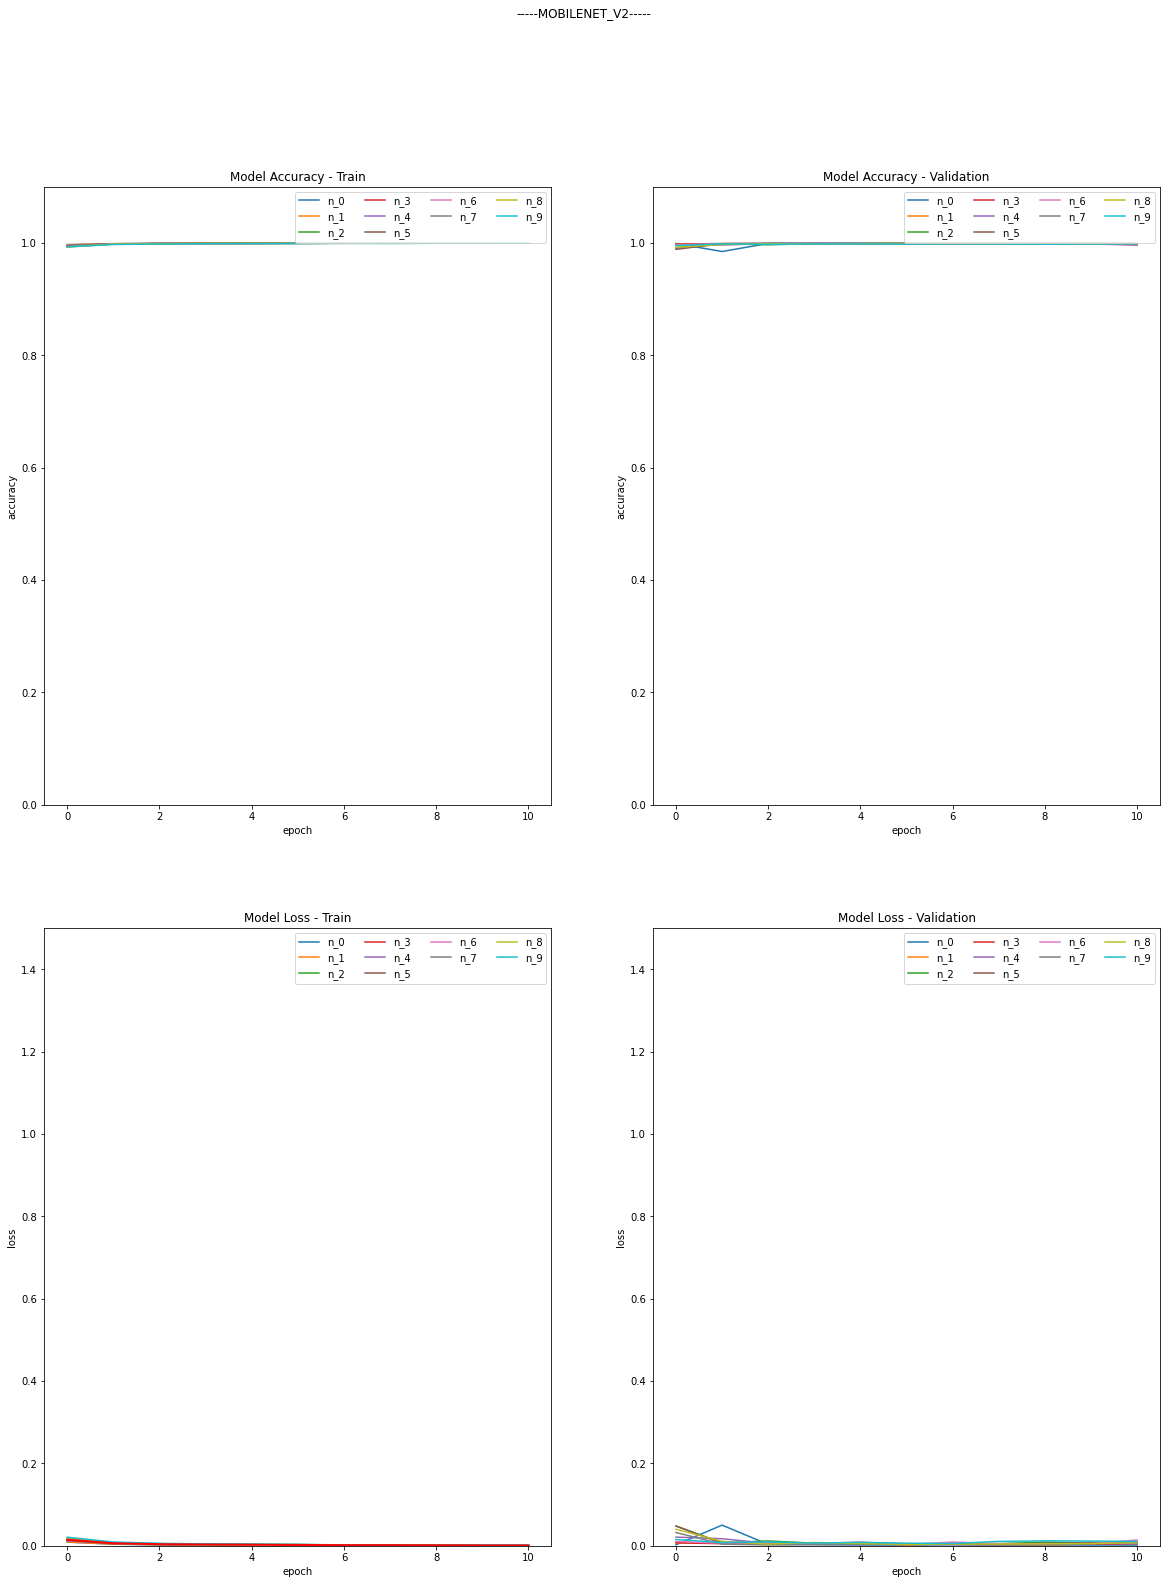

In [14]:
runner.draw_training_history()

# Load Best Model

In [15]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [16]:
runner.save_model()

-------------------- save model -------------------
Saving model


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Saving model to neptune
 ..Uploading file trained_model.zip
Model saved into Neptune
Saving process finished


# Test Trained Model

## Validation Split

In [17]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00060 | ACC: 0.99970
  Task  1: n_1             | EER_mean: 0.00080 | EER_interp: 0.00080 | ACC: 0.99920
  Task  2: n_2             | EER_mean: 0.00080 | EER_interp: 0.00080 | ACC: 0.99920
  Task  3: n_3             | EER_mean: 0.00260 | EER_interp: 0.00250 | ACC: 0.99740
  Task  4: n_4             | EER_mean: 0.00170 | EER_interp: 0.00140 | ACC: 0.99880
  Task  5: n_5             | EER_mean: 0.00090 | EER_interp: 0.00080 | ACC: 0.99920
  Task  6: n_6             | EER_mean: 0.00250 | EER_interp: 0.00240 | ACC: 0.99770
  Task  7: n_7             | EER_mean: 0.00160 | EER_interp: 0.00150 | ACC: 0.99860
  Task  8: n_8             | EER_mean: 0.00170 | EER_interp: 0.00160 | ACC: 0.99850
  Task  9: n_9             | EER_mean: 0.00240 | EER_interp: 0.00240 | ACC: 0.99760
final_EER_mean: 0.15% | final_ACC: 99.8

## Test Split

In [18]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
313/313 [==============================] - 7s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00200 | EER_interp: 0.00200 | ACC: 0.99810
  Task  1: n_1             | EER_mean: 0.00170 | EER_interp: 0.00170 | ACC: 0.99830
  Task  2: n_2             | EER_mean: 0.00210 | EER_interp: 0.00250 | ACC: 0.99780
  Task  3: n_3             | EER_mean: 0.00220 | EER_interp: 0.00260 | ACC: 0.99780
  Task  4: n_4             | EER_mean: 0.00300 | EER_interp: 0.00300 | ACC: 0.99700
  Task  5: n_5             | EER_mean: 0.00220 | EER_interp: 0.00220 | ACC: 0.99780
  Task  6: n_6             | EER_mean: 0.00310 | EER_interp: 0.00290 | ACC: 0.99730
  Task  7: n_7             | EER_mean: 0.00490 | EER_interp: 0.00340 | ACC: 0.99770
  Task  8: n_8             | EER_mean: 0.00100 | EER_interp: 0.00080 | ACC: 0.99940
  Task  9: n_9             | EER_mean: 0.00280 | EER_interp: 0.00290 | ACC: 0.99720
final_EER_mean: 0.24% | final_ACC: 99.7

# Visualize Model Classification

# Finishing Experiment Manager

In [19]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Finishing Neptune
Shutting down background jobs, please wait a moment...


Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout


Done!


Waiting for the remaining 10419 operations to synchronize with Neptune. Do not kill this process.
Still waiting for the remaining 10419 operations (0.00% done). Please wait.
Still waiting for the remaining 10419 operations (0.00% done). Please wait.
Still waiting for the remaining 10419 operations (0.00% done). Please wait.
Still waiting for the remaining 10419 operations (0.00% done). Please wait.
Still waiting for the remaining 10419 operations (0.00% done). Please wait.
Still waiting for the remaining 10419 operations (0.00% done). Please wait.
Still waiting for the remaining 10419 operations (0.00% done). Please wait.
Still waiting for the remaining 10419 operations (0.00% done). Please wait.
Still waiting for the remaining 10419 operations (0.00% done). Please wait.
Still waiting for the remaining 10419 operations (0.00% done). Please wait.
Still waiting for the remaining 10419 operations (0.00% done). Please wait.
Still waiting for the remaining 10419 operations (0.00% done). Ple

All 10419 operations synced, thanks for waiting!


# Testing Network Modification

# Test - Customized Loss Function

# Test - 